# 離散畳み込み(Discrete Convolution)

$\newcommand{\im}{\mathrm{i}}$

## 離散フーリエ変換(DFT)
離散畳み込みを理解するための、第一歩として、離散フーリエ変換を説明する。

**定義**　$b = (b_0, \dots , b_{2M-2}) \in \mathbb{C}^{2M-1} $ に対して、$a = \mathcal{F}(b) \in \mathbb{C}^{2M-1}$ を

$$
a_k = \mathcal{F}(b) := \sum_{j=0}^{2M-2} b_j e^{-2\pi \im (\frac{jk}{2M-1}) }
$$

とし、これを**離散フーリエ変換(DFT)**と呼ぶ。

## 逆離散フーリエ変換(IDFT)
**定義**　$a = (a_k)_{|k| < M} = (a_{-M+1}, \dots , a_{M-1}) \in \mathbb{C}^{2M-1}$ に対して、$b = \mathcal{F}^{-1} (a) \in \mathbb{C}^{2M-1}$を

$$
b_j = \mathcal{F}^{-1} (a) := \sum_{k = -M+1}^{M-1} a_k e^{2 \pi \im (\frac{jk}{2M-1})} \quad j=0, \dots , 2M-2
$$

とし、**逆離散フーリエ変換(IDFT)**と呼ぶ。

**注意**　一般的なDFT/IDFTはスケーリング係数をつけた形で定義されることが多い。っこの点で上の定義は一般的な定義と違う。

## 離散畳み込みのアルゴリズム

$u_1, u_2$を周期 $L$ 、変数 $t$ に関する周期関数とし、$\omega = \frac{2\pi}{L}$とする。このとき、$u_1, u_2$をフーリエ級数展開すると、

$$
    u_1(t) = \sum_{k \in \mathbb{Z}} a_{k}^{(1)} e^{\im k\omega t} , \quad a^{(1)} = (a_{k}^{(1)})_{k \in \mathbb{Z}} \\
    u_2(t) = \sum_{k \in \mathbb{Z}} a_{k}^{(2)} e^{\im k\omega t} , \quad a^{(2)} = (a_{k}^{(2)})_{k \in \mathbb{Z}}.
$$

そして、これらの周期関数の積は、

$$
    u_1(t)u_2(t) = \sum_{k \in \mathbb{Z}} (a^{(1)}*a^{(2)})_{k}  e^{\im kwt}
$$

と表される。ここで $ (a^{(1)}*a^{(2)})_k$ を**離散畳み込み**といい、

$$
     (a^{(1)}*a^{(2)})_k = \sum_{k_1 + k_2 = k \\ k_1 , k_2 \in \mathbb{Z}} a_{k_1}^{(1)} a_{k_2}^{(2)} , \quad k \in \mathbb{Z}
$$

と表される。


さらに、数値計算しやすいように応用すると、$u_1, u_2$ のような（有限モードのフーリエ級数で表される）周期関数が $p$ 個($p \in \mathbb{N}$)あったとき、

$$
    u_i(t) = \sum_{|k| < M} a_{k}^{(i)} e^{\im k\omega t} , \quad a^{(i)} = (a_{k}^{(i)})_{|k| < M} \quad
    i = 1 , \cdots ,p \quad M \in \mathbb{Z}
$$

離散畳み込みは

$$
    (a^{(1)}* \cdots *a^{(p)})_k = \sum_{k_1 + \cdots + k_p = k \\ |k| \leq p(M-1) \\ |k_1| , \cdots ,|k_p|<M} a_{k_1}^{(1)} \cdots  a_{k_p}^{(p)}
$$

と表される。


### 畳み込みの定理
畳み込みを離散フーリエ変換したものは、それぞれのフーリエ係数の離散フーリエ変換の積になる。

$$
\begin{aligned}
    \mathcal{F}(a^{(1)}* \cdots *a^{(p)}) &= \mathcal{F}(a^{(1)}) \cdots \mathcal{F}(a^{(p)}) \\
    &= b^{(1)}\cdots b^{(p)}
\end{aligned}
$$

ここで $ b^{(1)} \cdots b^{(p)}$ におけるベクトル同士の積は、要素毎の積を表す。

In [88]:
using FFTW, Plots

function fouriercoeffs(f,N)
    h = 2.0π/(2N-1)
    xⱼ = h*(0:2N-2)
    fⱼ = f.(xⱼ);
    return fftshift(fft(fⱼ))/(2N-1)
end

function plot_fourier(cₖ)
    N = (length(cₖ)+1)/2# 2N-1
    n_pad = 200
    cₖ_pad = [zeros(n_pad);cₖ;zeros(n_pad)]
    N_pad = N + n_pad
    h_pad = 2.0π/(2N_pad-1)
    xⱼ_pad = h_pad*(0:2N_pad-2)
    
    fᴺⱼ_pad = real((2N_pad-1)*ifft(ifftshift(cₖ_pad)))
    plot(xⱼ_pad, fᴺⱼ_pad, legend=false, title = "Plot f(x) with padding")
end

plot_fourier (generic function with 1 method)

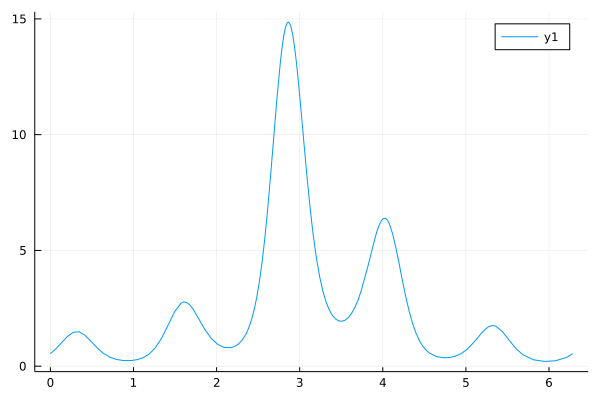

In [70]:
f(x) = exp(sin(5x))/(1+sin(cos(x)))
plot(f,0,2π)

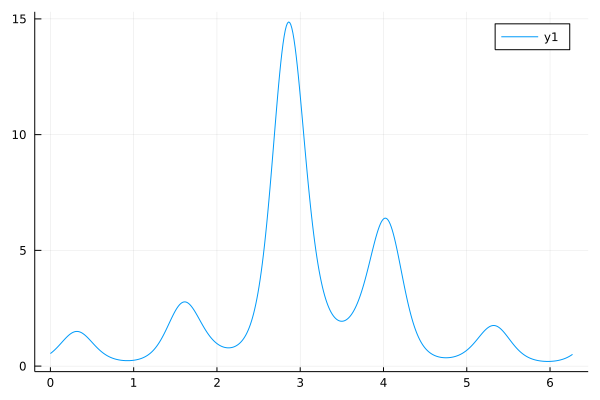

In [118]:
using ApproxFun, FFTW
fc = Fun(f,Laurent())
plot(real(fc))

In [120]:
m

143

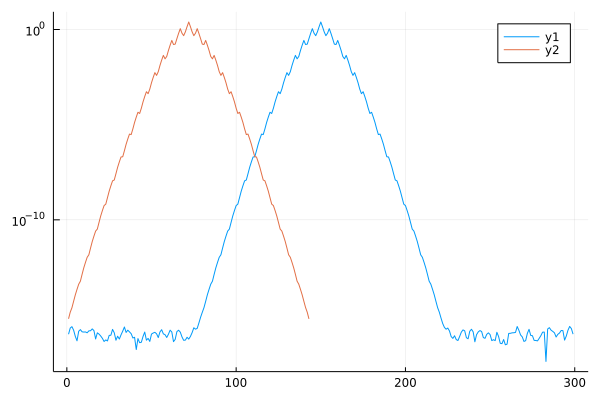

In [132]:
m = ncoefficients(fc)
M = Int((m+1)/2)
c = coefficients(fc) # coefficients of ApproxFun
function index_shift(c) # convert c -> fourier coeffs
    return [reverse(c[2:2:end]);c[1:2:end]]
end
a = fouriercoeffs(f,150)
plot(abs.(a),yscale=:log10,)
plot!(abs.(index_shift(c)),yscale=:log10,)



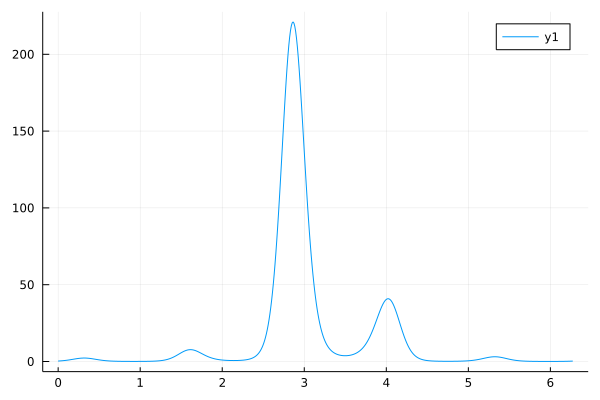

In [107]:
plot(real(fc^2))

In [127]:
M

72

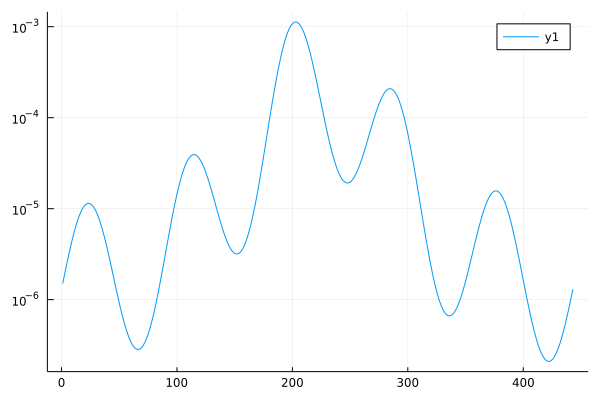

In [133]:
# M = ncoefficients(fc)
# c = coefficients(fc) # Chebyshev coefficient
# a = [reverse(0.5*c[2:end]); c[1]; 0.5*c[2:end]]# Fourier coefficient

p = 2
N = (p-1)*M
ta = [zeros(N,1);a;zeros(N,1)] # 1. Padding zeros
tb = ifft(ifftshift(ta)) # 2. IFFT of ta
tbᵖ = tb.^p # 3. tb*^tb
cᵖ = real(fftshift(fft(tbᵖ))*(2.0*p*M-1)^(p-1)) # 4. FFT of tb2
# cᵖ_c = [cᵖ[N+M]; 2*cᵖ[N+M+1:N+M+p*(M-1)]]# Take Chebyshev coefficient
# plot(abs.(cᵖ[N+1:end-N]),yscale=:log10)

# ff = Fun(Chebyshev(),cᵖ_c)
# plot!(ff,line=2)
# length(index_shift(coefficients(fc^2)))
# length(cᵖ)
# plot(abs.(index_shift(coefficients(fc^2))),yscale=:log10,)
# plot(abs.(tbᵖ),yscale=:log10,)
plot_fourier(cᵖ)